In [2]:

import json

import plot_likert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
results_file = 'survey_results.json'
with open(results_file, 'r') as results_f:
	results = json.load(results_f)

In [16]:
kg_quests = 0
no_kg_quests = 0
similar = 0

for k, v in results.items():
	similar += v['pick_counts']['similar']
	kg_quests += v['pick_counts']['kg']
	no_kg_quests += v['pick_counts']['no_kg']
 
total = kg_quests + no_kg_quests + similar

In [40]:
print('KG quests pick count:\t\t|\t', kg_quests)
print('No KG quests pick count:\t|\t', no_kg_quests)
print('"Both Similar" pick count:\t|\t', similar)
print('--------------------------------|-------------')
print('Total num of quests:\t\t|\t', total)

KG quests pick count:		|	 146
No KG quests pick count:	|	 37
"Both Similar" pick count:	|	 37
--------------------------------|-------------
Total num of quests:		|	 220


In [46]:
columns = ['Relatedness', 'Contradiction', 'Coherence', 'Value']
questions_arr = list(results.keys())

likert_mapping = {
    'Strongly Agree': plot_likert.scales.agree[4],
    'Agree': plot_likert.scales.agree[3],
    'Neutral': plot_likert.scales.agree[2],
    'Disagree': plot_likert.scales.agree[1],
    'Strongly Disagree': plot_likert.scales.agree[0]
}

likert_values = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree' ]

likert_value_mapping = {
    'Strongly Agree': 2,
    'Agree': 1,
    'Neutral': 0,
    'Disagree': -1,
    'Strongly Disagree': -2
}

In [3]:
kg_data = pd.read_csv('kg_outputs.tsv', sep='\t')
kg_data

,Relatedness,Contradiction,Coherence,Value
0,Strongly agree,Strongly disagree,Strongly agree,Strongly agree
1,Agree,Agree,Disagree,Neutral
2,Agree,Disagree,Disagree,Neutral
3,Strongly agree,Strongly disagree,Agree,Strongly agree
4,Strongly agree,Strongly disagree,Strongly agree,Strongly agree
...,...,...,...,...
215,Strongly agree,Strongly disagree,Agree,Agree
216,Strongly agree,Strongly disagree,Strongly agree,Strongly agree
217,Strongly agree,Strongly disagree,Strongly agree,Strongly agree
218,Agree,Disagree,Agree,Agree


In [10]:
for column in kg_data.columns:
    print(kg_data[column].value_counts(), '\n')

Relatedness
Strongly agree       119
Agree                 69
Disagree              18
Neutral               12
Strongly disagree      2
Name: count, dtype: int64 

Contradiction
Strongly disagree    85
Disagree             62
Agree                33
Neutral              28
Strongly agree       12
Name: count, dtype: int64 

Coherence
Strongly agree       79
Agree                78
Disagree             41
Neutral              17
Strongly disagree     5
Name: count, dtype: int64 

Value
Strongly agree       89
Agree                82
Neutral              28
Disagree             17
Strongly disagree     4
Name: count, dtype: int64 



In [ ]:
print('KG Relatedness Average: ', kg_rel_avg)
print('KG Contradiction Average: ', kg_cont_avg)
print('KG Coherence Average: ', kg_coh_avg)
print('KG Value Average: ', kg_val_avg)

<Axes: xlabel='Number of Responses'>

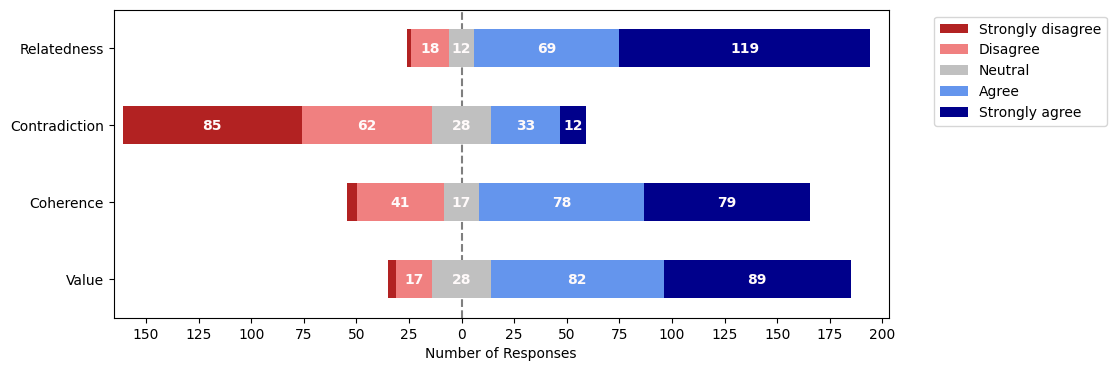

In [47]:
plot_likert.plot_likert(kg_data, likert_values,
    bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral, figsize=(10,4))

In [12]:
no_kg_data = pd.read_csv('no_kg_outputs.tsv', sep='\t')
no_kg_data

,Relatedness,Contradiction,Coherence,Value
0,Disagree,Strongly agree,Disagree,Disagree
1,Strongly agree,Strongly disagree,Agree,Agree
2,Agree,Disagree,Agree,Neutral
3,Strongly agree,Strongly disagree,Strongly agree,Strongly agree
4,Strongly agree,Disagree,Strongly agree,Agree
...,...,...,...,...
215,Disagree,Strongly agree,Strongly disagree,Disagree
216,Disagree,Agree,Disagree,Disagree
217,Strongly agree,Disagree,Neutral,Agree
218,Neutral,Neutral,Neutral,Neutral


In [49]:
print('No KG Relatedness Average: ', no_kg_rel_avg)
print('No KG Contradiction Average: ', no_kg_cont_avg)
print('No KG Coherence Average: ', no_kg_coh_avg)
print('No KG Value Average: ', no_kg_val_avg)

No KG Relatedness Average:  0.41818181818181815
No KG Contradiction Average:  0.36818181818181817
No KG Coherence Average:  -0.33181818181818185
No KG Value Average:  -0.18636363636363637


In [13]:
for column in no_kg_data.columns:
    print(no_kg_data[column].value_counts(), '\n')

Relatedness
Agree                90
Strongly agree       42
Disagree             36
Neutral              29
Strongly disagree    23
Name: count, dtype: int64 

Contradiction
Agree                62
Strongly agree       51
Disagree             49
Neutral              41
Strongly disagree    17
Name: count, dtype: int64 

Coherence
Disagree             74
Agree                43
Strongly disagree    42
Neutral              40
Strongly agree       21
Name: count, dtype: int64 

Value
Disagree             63
Agree                48
Neutral              44
Strongly disagree    39
Strongly agree       26
Name: count, dtype: int64 



/home/manish/miniconda3/envs/data_expl/lib/python3.11/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


<Axes: xlabel='Number of Responses'>

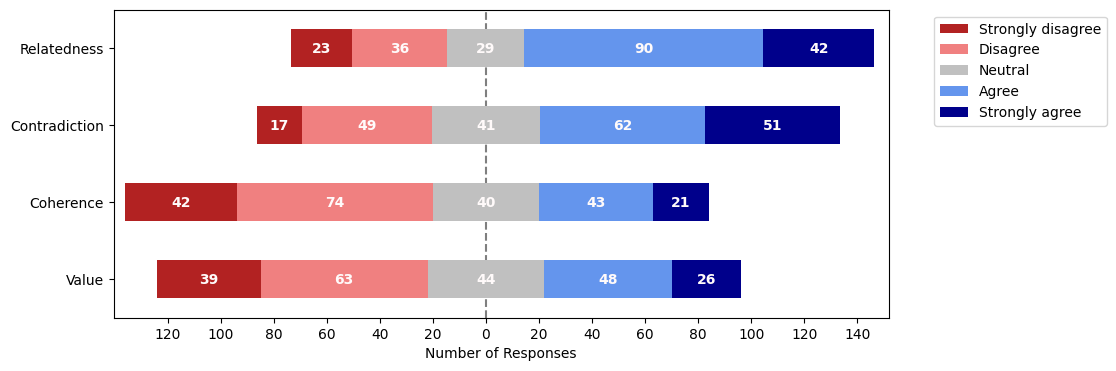

In [50]:
plot_likert.plot_likert(no_kg_data, likert_values,
    bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral, figsize=(10,4))